## <div style="text-align: center; background-color:#bd7e4a;  color: black; padding: 14px; line-height: 0.5;"> <b>Credit Cards Spending : Trends, EDA, Prediction</b></div>

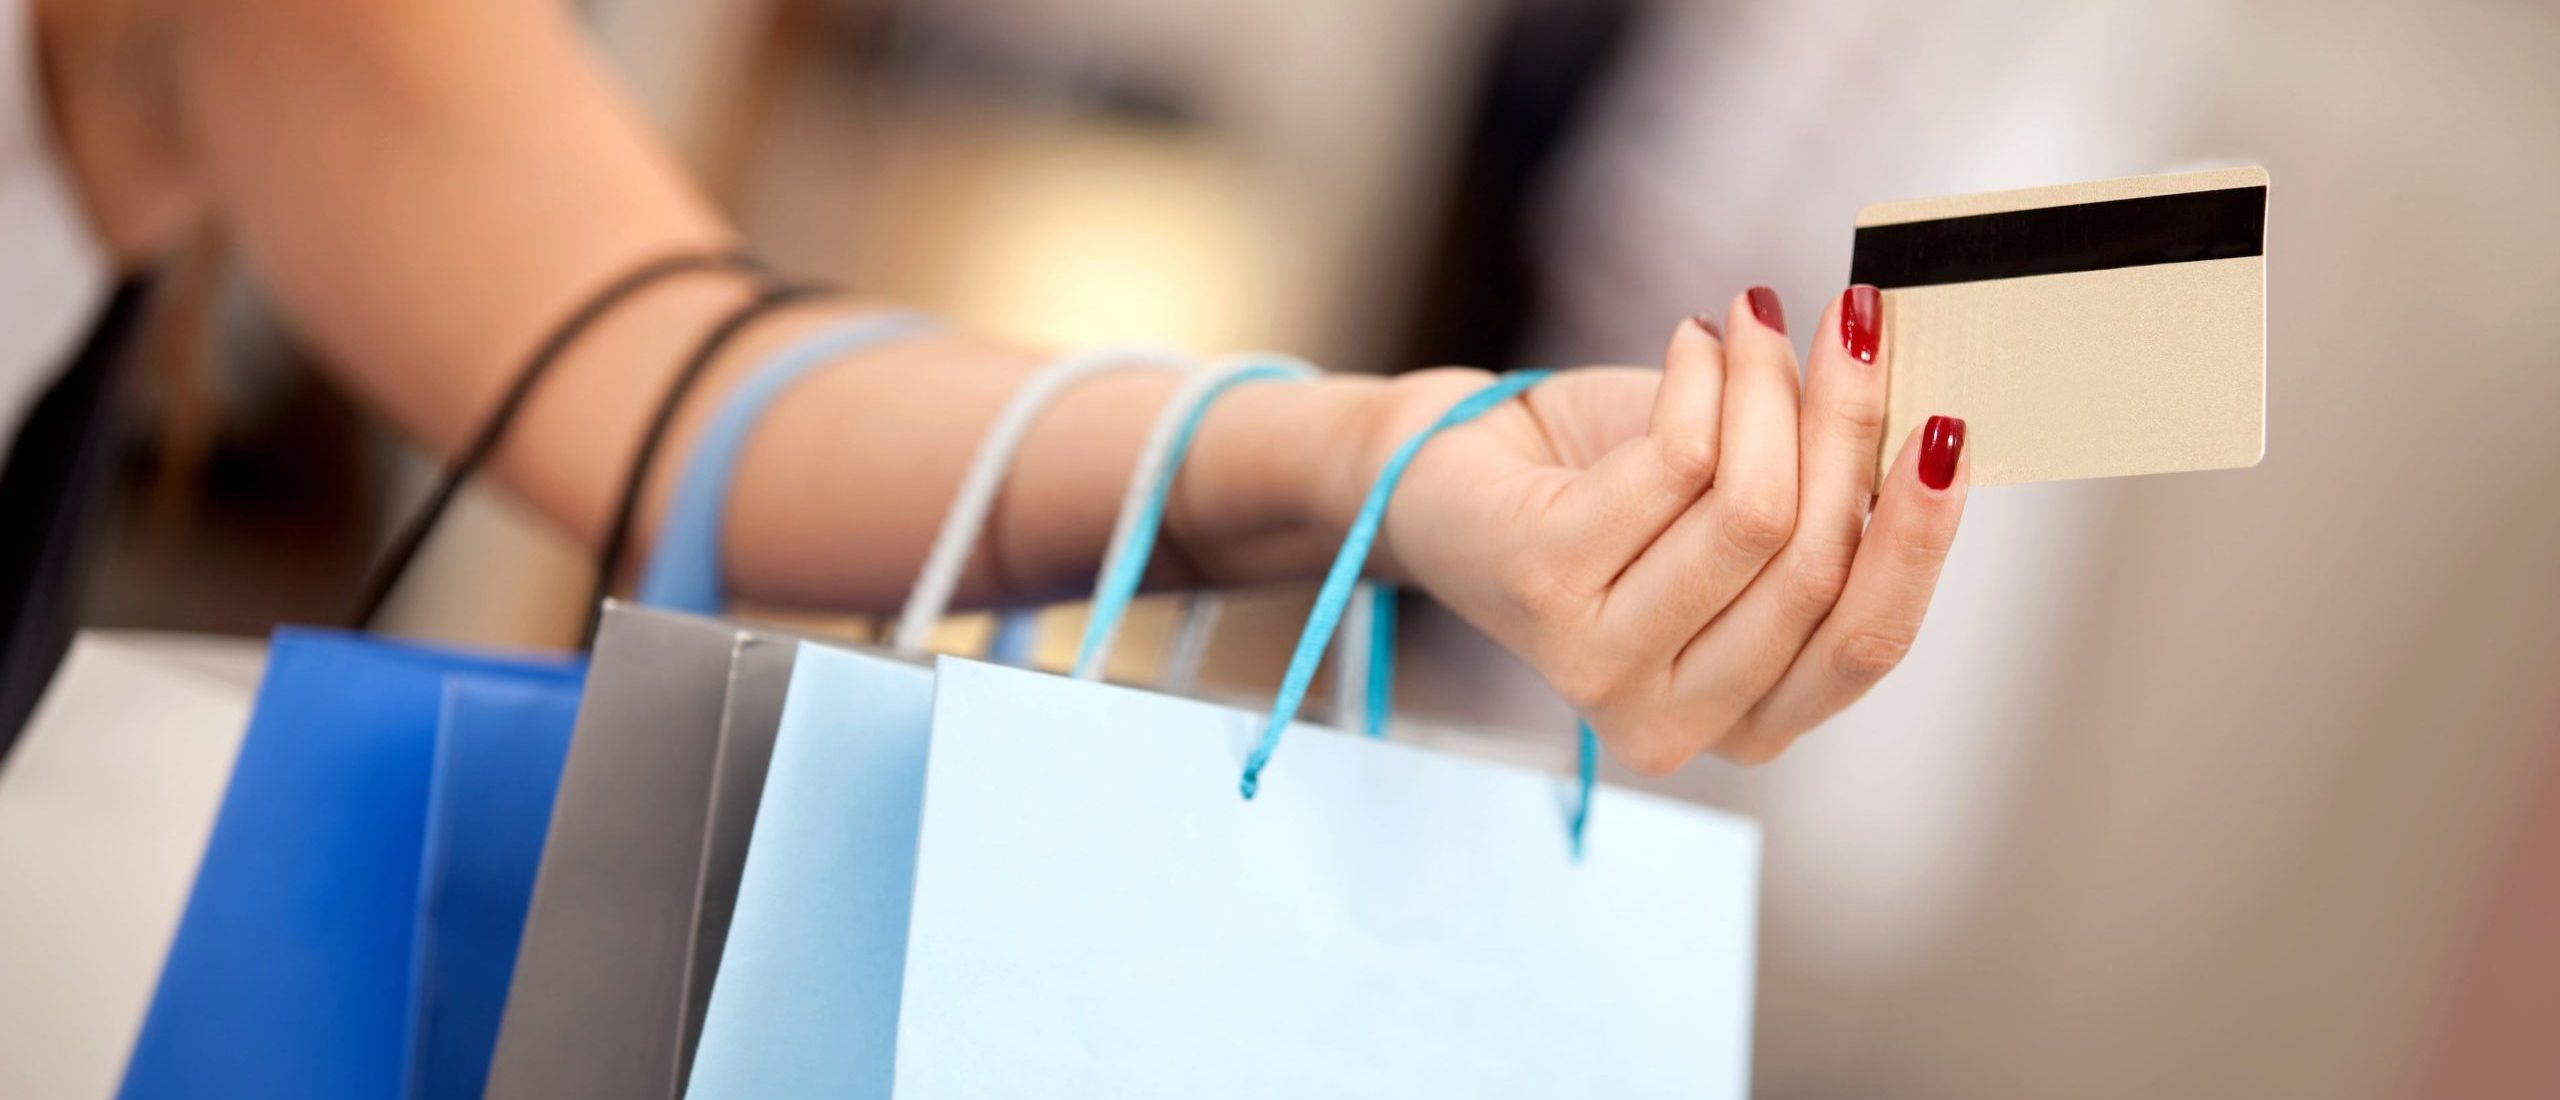

# <div style="text-align: left; background-color:#d2a56d;  color: black; padding: 14px; line-height: 0.5;"> Importing Libraries</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style



#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# <div style="text-align: left; background-color: #d2a56d;  color: black; padding: 14px; line-height: 0.5;"> Reading Datasets from csv files</div>

In [2]:
ccd_df = pd.read_csv('/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv')
print(Back.YELLOW+ Style.BRIGHT+'Credit Card Spending Habits in India:'+ Style.RESET_ALL)
ccd_df.head().style.set_properties(**{'background-color': '#f1c27d' ,'color':'black','border-color': '#000000'})

Credit Card Spending Habits in India:


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


# <div style="text-align: left; background-color: #d2a56d;  color: black; padding: 14px; line-height: 0.5;"> Data Preparation</div>

In [3]:
print(Back.YELLOW+ Style.BRIGHT+'Count of Null values:'+ Style.RESET_ALL)
na_df=ccd_df.isnull().sum().reset_index()
na_df.style.set_properties(**{'background-color': '#f1c27d' ,'color':'black','border-color': '#000000'})

Count of Null values:


,index,0
0,index,0
1,City,0
2,Date,0
3,Card Type,0
4,Exp Type,0
5,Gender,0
6,Amount,0


<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.0;"> <b>Observation:</b>   
    There are no null values in any of the features in the dataset

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observations:</b>  
    
   In the dataset there are 6 columns and 26052 rows:  
   <b>Numerical columns:</b> Amount  
   <b>Categorical columns:</b> City, Date, Card Type, Exp Type, Gender 

In [4]:
print(Back.YELLOW+ Style.BRIGHT+ 'Summary of Credit Card Data:' + Style.RESET_ALL)
print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Card Type' + Style.RESET_ALL+'       :',\
      Fore.RED+ Style.BRIGHT+ str(len(ccd_df['Card Type'].unique())) + Style.RESET_ALL + ' (Gold, Platinum, Silver, Signature)')

print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Expenses Type' + Style.RESET_ALL +'   :',\
      Fore.RED+ Style.BRIGHT+ str(len(ccd_df['Exp Type'].unique())) + Style.RESET_ALL + ' (Bills, Food, Entertainment, Grocery, Fuel, Travel)')

print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Cities' + Style.RESET_ALL +'          :',\
      Fore.RED+ Style.BRIGHT+ str(len(ccd_df['Gender'].unique())) + Style.RESET_ALL + ' (Male, Female)')

print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Cities' + Style.RESET_ALL +'          :',\
      Fore.RED+ Style.BRIGHT+ str(len(ccd_df['City'].unique())) + Style.RESET_ALL)


Summary of Credit Card Data:
Total number of Card Type       : 4 (Gold, Platinum, Silver, Signature)
Total number of Expenses Type   : 6 (Bills, Food, Entertainment, Grocery, Fuel, Travel)
Total number of Cities          : 2 (Male, Female)
Total number of Cities          : 986


# <div style="text-align: left; background-color: #d2a56d;  color: black; padding: 14px; line-height: 0.5;"> Exploratory Data Analysis</div>

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Monthly Spending Trend Analysis</div>

In [5]:
ccd_df['Date'] = pd.to_datetime(ccd_df['Date']) 
ccd_df['Year-Month'] = ccd_df['Date'].to_numpy().astype('datetime64[M]') 
ccd_df['City'] = ccd_df['City'].apply(lambda x: x.split(",")[0])

monthly_df = ccd_df[['Year-Month','Card Type','Amount']].groupby(['Year-Month','Card Type']).agg(mean_exp_amt=('Amount', 'mean')).reset_index().sort_values(['Year-Month','Card Type'])
monthly_df['mean_exp_amt']=monthly_df['mean_exp_amt'].astype('int')

fig = px.line(data_frame=monthly_df, x='Year-Month',y='mean_exp_amt', color='Card Type',template='simple_white',markers=True)
# fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_yaxes(showgrid=True)
fig.update_layout(hovermode="x unified")

fig.update_layout(
    title='<b>Monthly Mean Expenditure Trend - Line Plot</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Year Month</b>",
    yaxis_title="<b>Mean Expenditure</b>",
    legend_title='<b>Card Type</b>',
    legend_title_font_color="red",
    plot_bgcolor = '#FFFFFF'
)

fig.show()

In [6]:
monthly_df['Year-Month']=monthly_df['Year-Month'].astype(str)
fig=px.violin(data_frame=monthly_df, x='Year-Month',y='mean_exp_amt',template='simple_white',
              color='Year-Month',
               color_discrete_sequence= ['red', 'orange', 'blue', 'green']) 
fig.update_yaxes(showgrid=True)

fig.update_layout(
    title='<b>Monthly Mean Expenditure Trend-Violin Plot</b>',
    font_family="Courier New",
    title_font_family="Times New Roman",title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Year Month</b>",
    yaxis_title="<b>Mean Expenditure</b>",
    plot_bgcolor = '#FFFFFF'
)

fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation:</b>  
     In above plots we can there is no clear pattern of expense over a period of time, for all of the card types. Amounts on all card types are fluctuating between 135K and 180K

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Spend Analysis on Card Type</div>

In [7]:
ccd_cnt_amt_df = ccd_df[['Card Type', 'Amount']].groupby('Card Type')['Amount'].agg(['sum','count']).reset_index()
colors = ['#83502e', '#bd7e4a', '#d2a56d', '#f1c27d', '#ffdbac', '#ffeead']
colors2=['red', 'orange', 'blue', 'green', 'brown', 'yellow']

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'xy'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=["Count","Amount"])
fig.add_trace(go.Pie(labels=ccd_cnt_amt_df['Card Type'], values=ccd_cnt_amt_df['count'],name='count', marker_colors=colors),row=1,col=1)

fig.add_trace(go.Bar(x=ccd_cnt_amt_df['Card Type'],y=ccd_cnt_amt_df['sum'], text=ccd_cnt_amt_df['sum'], marker_color=colors ),row=1,col=2)

fig.update_layout(height=400,width=1000, 
                  title_text="<b>Card Type wise Count and Amount</b>",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_family="Times New Roman",title_font_color="#83502e",
                  title_font_size=20,
                  showlegend=True,
                  legend_bgcolor='#fdf1cb',
                  paper_bgcolor='#fdf1cb',
                  plot_bgcolor = '#fdf1cb')
fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.0;"> <b>Observation:</b>  
    The Count of transactions and Sum of all transactions amount is same for all of the card types with little high on Silver Cards

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Spend Analysis on Expenses Type</div>

In [8]:
#Expense Type : Amount and Count
ccd_exp_amt_df = ccd_df[['Exp Type', 'Amount']].groupby('Exp Type')['Amount'].agg(['sum','count']).reset_index()
ccd_exp_amt_df.columns=['Exp Type', 'Total Amount', 'Transactions']
ccd_exp_amt_df = ccd_exp_amt_df.sort_values('Total Amount', ascending= False)
ccd_exp_amt_df

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'xy'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=["Count","Amount"]    )
fig.add_trace(go.Pie(labels=ccd_exp_amt_df['Exp Type'], values=ccd_exp_amt_df['Transactions'], marker_colors=colors),row=1,col=1)

fig.add_trace(go.Bar(x=ccd_exp_amt_df['Exp Type'], y=ccd_exp_amt_df['Total Amount'], text=ccd_exp_amt_df['Total Amount'], marker_color=colors),row=1,col=2)

fig.update_layout(height=400,width=1000, title_text="<b>Expense Type wise Count and Total Amount</b>",
                  title_font_family="Times New Roman",title_font_color="#83502e",
                  title_font_size=20,
                  title_xanchor="center",
                  title_x=0.5,
                  showlegend=True,
                  legend_bgcolor='#fdf1cb',
                  paper_bgcolor='#fdf1cb',
                  plot_bgcolor ='#fdf1cb')
fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.0;"> <b>Observation:</b>  
    The Count of transactions and sum of all transaction amounts for all of the card types is nearly same with little high on Silver

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Spend Analysis on Gender</div>

In [9]:
#Expense Type : Amount and Count
gen_exp_amt_df = ccd_df[['Gender', 'Amount']].groupby('Gender')['Amount'].agg(['sum','count']).reset_index()
gen_exp_amt_df.columns=['Gender', 'Total Amount', 'Transactions']
gen_exp_amt_df = gen_exp_amt_df.sort_values('Total Amount', ascending= False)
gen_exp_amt_df

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'xy'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=["Count","Amount"]    )
fig.add_trace(go.Pie(labels=gen_exp_amt_df['Gender'], values=gen_exp_amt_df['Transactions'], name="Count", marker_colors=colors),row=1,col=1)
fig.add_trace(go.Bar(x=gen_exp_amt_df['Gender'], y=gen_exp_amt_df['Total Amount'],name="Total Amount", text=gen_exp_amt_df['Total Amount'],marker_color=colors),row=1,col=2)
fig.update_layout(height=400,width=1000, title_text="<b>Gender wise Count and Total Amount</b>",
                  title_font_family="Times New Roman",title_font_color="#83502e",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  showlegend=True,
                  legend_bgcolor='#fdf1cb',
                  paper_bgcolor='#fdf1cb',
                  plot_bgcolor ='#fdf1cb')
fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>  
We can see females spending more amount than males.  
We can see more number of transactons in <b>Food</b> followed by <b>Fuel</b> and <b>Bills</b> in the third place.  
Total Amount wise we have highest amount in <b>Bills</b>, followed by <b>Food</b> and <b>Fuel</b> in the third place

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Classifying Cities into Tier-1,  Tier-2 and  Tier-3</div>

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.0;"> <b>Observation:</b>The spending paterns are generally affected by city/town in which the customer lives. So, let us classify the cities given in the dataset into Tier-1, Tier-2 and Tier-3 cities.

Reference : Clasification of the cities taken from the source https://en.wikipedia.org/wiki/Classification_of_Indian_cities

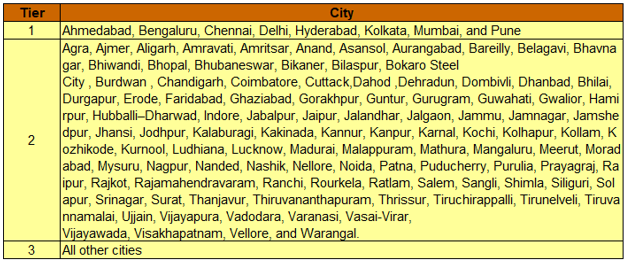

In [10]:
t1=['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']
t2=['Ajmer','Aligarh','Amravati','Amritsar','Anand','Asansol','Aurangabad','Bareilly','Belagavi','Bhavnagar','Bhiwandi','Bhopal','Bhubaneswar','Bikaner','Bilaspur','Bokaro Steel City','Burdwan','Chandigarh','Coimbatore','Cuttack','Dahod','Dehradun','Dombivli','Dhanbad','Bhilai','Durgapur','Erode','Faridabad','Ghaziabad','Gorakhpur','Guntur','Gurugram','Guwahati','Gwalior','Hamirpur','Hubli-Dharwad','Indore','Jabalpur','Jaipur','Jalandhar','Jalgaon','Jammu','Jamnagar','Jamshedpur','Jhansi','Jodhpur','Kalaburagi','Kakinada','Kannur','Kanpur','Karnal','Kochi','Kolhapur','Kollam','Kozhikode','Kurnool','Ludhiana','Lucknow','Madurai','Malappuram','Mathura','Mangaluru','Meerut','Moradabad','Mysore','Nagpur','Nanded-Waghala','Nashik','Nellore','Noida','Patna','Puducherry','Purulia','Prayagraj','Raipur','Rajkot','Rajahmundry','Ranchi','Rourkela','Ratlam','Salem','Sangli','Shimla','Siliguri','Solapur','Srinagar','Surat','Thanjavur','Thiruvananthapuram','Thrissur','Tiruchirappalli','Tirunelveli','Tiruvannamalai','Ujjain','Vijayapura','Vadodara','Varanasi','Vasai-Virar','Vijayawada','Visakhapatnam','Vellore','Warangal']

def city_tier(city):
  if city in t1:
    return 'Tier-1'
  elif city in t2:
    return 'Tier-2'
  else :
    return 'Tier-3'

ccd_df['City'] = ccd_df['City'].apply(lambda x: x.split(',')[0])
ccd_df['City Tier'] = ccd_df['City'].apply(lambda x: city_tier(x))
ccd_df.head().style.set_properties(**{'background-color': '#f1c27d' ,'color':'black','border-color': '#000000'})


,index,City,Date,Card Type,Exp Type,Gender,Amount,Year-Month,City Tier
0,0,Delhi,2014-10-29 00:00:00,Gold,Bills,F,82475,2014-10-01 00:00:00,Tier-1
1,1,Greater Mumbai,2014-08-22 00:00:00,Platinum,Bills,F,32555,2014-08-01 00:00:00,Tier-3
2,2,Bengaluru,2014-08-27 00:00:00,Silver,Bills,F,101738,2014-08-01 00:00:00,Tier-1
3,3,Greater Mumbai,2014-04-12 00:00:00,Signature,Bills,F,123424,2014-04-01 00:00:00,Tier-3
4,4,Bengaluru,2015-05-05 00:00:00,Gold,Bills,F,171574,2015-05-01 00:00:00,Tier-1


### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> City Tier wise Analysis on Spent Amount</div>

In [11]:
tier_df2=ccd_df[['City Tier', 'Amount']].groupby('City Tier').agg(Total_Amount=('Amount', 'sum')).reset_index()

fig = px.bar(tier_df2,
             x='City Tier', y='Total_Amount', color='City Tier', color_discrete_sequence=colors, text_auto='True' )

fig.update_layout(height=400,width=1000, title_text="<b>City Tier wise Amount Spent</b>",
                  title_font_family="Times New Roman",title_font_color="#83502e",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>City Tier</b>",
                  yaxis_title="<b>Amount Spent</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#83502e",
                  showlegend=True,
                  plot_bgcolor ='#fdf1cb')
fig.show()

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> City Tier wise Analysis on Credit Card Transactions Count</div>

In [12]:
tier_df=ccd_df[['City Tier']].groupby('City Tier').size().reset_index()
tier_df.columns=['City Tier','Count']

fig = px.bar(tier_df,
             x='City Tier', y='Count', color='City Tier', color_discrete_sequence=colors, text_auto='True' )

fig.update_layout(height=400,width=1000, title_text="<b>City Tier wise Transaction Count</b>",
                  title_font_family="Times New Roman",title_font_color="#83502e",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>City Tier</b>",
                  yaxis_title="<b>Transaction Count</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#83502e",
                  showlegend=True,
                  plot_bgcolor ='#fdf1cb')
fig.show()

In [13]:
city_cnt_df = ccd_df[['City Tier']].groupby(['City Tier']).size().reset_index()
city_cnt_df.columns = ['City Tier','Count']

fig = px.pie(city_cnt_df,
            names = 'City Tier' , values = 'Count' , color = 'City Tier' , hole = 0.25 , 
            template = 'ggplot2' , title = '<b> City Tier wise Credit Card Transaction Count </b>',
            labels={"Tier-1":"<b>Tier-1</b>"}, color_discrete_sequence=colors)

fig.update_traces(textinfo='percent+ value + label')

fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
    ))


fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="#83502e",
    title_font_size=20,
    title_xanchor="center",
    title_x=0.5
)

fig.update_traces(textposition='inside', textinfo='percent+label',
                         pull=[0, 0.2, 0], rotation=0)



fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observations: </b>The number cities listed under Tier-1 are only <b>7</b>, but they comprise of <b>13603</b> transactions to become highest among all the three tiers. This could be due to life style habits and digitisation business in the Tier-1 cities.  
    
Under Tier-2 group we see less number of transactions than Tier-3 group. This could be due to high number of cities that are present in the Tier-3 group.

So, it is worth analysing the number of transactions per city in each tier.

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Analysis of Transactions Per City Tier</div>

In [14]:
city_cnt_df = ccd_df[['City Tier']].groupby(['City Tier']).size().reset_index()
city_cnt_df.columns = ['City Tier','Count']
city_cnt_df['Num_of_Cities'] = [7, 85, 894]  #Number of cities as per city clasification
city_cnt_df['Trans_Per_City'] = city_cnt_df['Count'] /city_cnt_df['Num_of_Cities']
city_cnt_df['Trans_Per_City']=city_cnt_df['Trans_Per_City'].astype('int')

fig =px.bar(city_cnt_df, y='City Tier',x='Trans_Per_City', orientation='h', color='City Tier', color_discrete_sequence=colors,text_auto='True')
fig.update_layout(
    title='<b>Number of Transactions per City</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",title_font_color="#83502e",
    title_font_size=20,
    xaxis_title="<b>No. of Transactions</b>",
    yaxis_title="<b>City Tier</b>",
    legend_title='<b>City Tier</b>',
    legend_title_font_color="#83502e",
                  plot_bgcolor ='#fdf1cb'
)

fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>From the Horizontal Bar plot we can see very high number transactions per city in Tier-1 (<b>1943</b> Transactions), followed by Tier-2 (<b>41</b> Transactions) and Tier-3 (<b>9</b> Transactions). This evident that there is lot scope for business expansion in Tier-2 and Tier-3 cities.

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Analysis of Credit Card Type wise Transaction Count across City Tiers</div>

In [15]:
tier_cdd_df = ccd_df[['City Tier','Card Type']].groupby(['City Tier','Card Type']).size().reset_index()

tier_cdd_df.columns = ['City Tier',	'Card Type','Count']

tier_cdd_df = ccd_df[['City Tier','Card Type']].groupby(['City Tier','Card Type']).size().reset_index()

tier_cdd_df.columns = ['City Tier',	'Card Type','Count']

fig1=px.bar(data_frame=tier_cdd_df, x='City Tier', y='Count', color='Card Type', barmode='group', color_discrete_sequence=colors, text_auto='True')

fig1.update_layout(
    title='<b>Transaction count across Cities Tiers</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#83502e",
    title_font_size=20,
    xaxis_title="<b>City Tier</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Card Type</b>',
    legend_title_font_color="#83502e",
    plot_bgcolor ='#fdf1cb'
)


fig1.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.0;"> <b>Observation: </b>The number of transactions are nearly same across all Card types and City Tiers, with little high count on Silver cards.

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Analysis of Credit Card Type wise Transaction Amount across City Tiers</div>

In [16]:
tier_ccd_amt_df = ccd_df[['City Tier','Card Type', 'Amount']].groupby(['City Tier','Card Type']).sum('Amount').reset_index()
tier_ccd_amt_df.columns = ['City Tier','Card Type','Amount']

fig=px.bar(data_frame=tier_ccd_amt_df, x='City Tier', y='Amount', color='Card Type', barmode='group', color_discrete_sequence=colors, text_auto='True')

fig.update_layout(
    title='<b>Credit Card Type wise Transaction Amount across Cities </b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#83502e",
    title_font_size=20,
    xaxis_title="<b>City Tier</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Card Type</b>',
    legend_title_font_color='#fdf1cb',
    plot_bgcolor = '#fdf1cb'
)

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>The pattern of amount on cards is similarly the pattern shown in transactions count. The total transaction amounts are nearly same across all of the Card types and city tiers, with little high count on Silver cards.

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Analysis of Male and Female Spend Patterns</div>

In [17]:
def exp_plot(gender):
  exp_df = ccd_df[ccd_df['Gender']==gender][['City Tier', 'Exp Type', 'Amount']]
  exp_df = exp_df.sort_values(['City Tier'])
  if gender=='M': 
    gender_name='Male' 
  else:
    gender_name='Female' 

  fig=px.violin(data_frame=exp_df, 
                x=['City Tier','Exp Type'],y='Amount',template='simple_white',
                color = 'Exp Type',box=True,
                category_orders={"Exp Type"  : ['Bills', 'Food', 'Entertainment', 
                                                'Grocery', 'Fuel', 'Travel'],
                                 "City Tier" : ['Tier-1', 'Tier-2', 'Tier-3']},
                color_discrete_sequence=colors2)
  fig.update_yaxes(showgrid=True)

  fig.update_layout(
      title='<b>%s - Spend Pattern</b>' %gender_name,
      font_family="Courier New",
      title_font_family="Courier New",
      title_font_color="red",
      title_font_size=20,
      xaxis_title="<b>Year Month</b>",
      yaxis_title="<b>Mean Expenditure</b>",
      legend_title='<b>Exp Type</b>',
      legend_title_font_color="red",
      plot_bgcolor = '#FFFFFF'
  )

  fig.show()

In [18]:
exp_plot('F')

In [19]:
exp_plot('M')

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>All of the Expenses Types except 'Bills' are having values between <b>1K</b> and <b>300K</b>. The spending pattern is same for both <b>Male</b> and <b>Female</b>.  
    For expense type 'Bills' the values are from <b>1K</b> to <b>1M</b>.   
There are <b>no records</b> for Expense type <b>Travel</b> in Tier-3. This can be good case for new business expansion in Tier-3 cities

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Analysis of High Value Transactions</div>

In [20]:
e300k_ccd_df =ccd_df[(ccd_df['Amount'] >= 300000)][['City Tier', 'Card Type', 'Amount']]
fig=px.histogram(e300k_ccd_df, x='Amount' , color='City Tier', nbins=50, text_auto=True, template='ggplot2', color_discrete_sequence=colors)
fig.update_layout(bargap=0)
fig.update_layout(yaxis_range=[0,20])

fig.update_layout(
    title='<b>High Value Transaction Distribution</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#83502e",
    title_font_size=20,
    xaxis_title="<b>Amount</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>City Tier</b>',
    legend_title_font_color='#fdf1cb',
    plot_bgcolor = '#fdf1cb'
)

fig.show()

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>We can see the high value transactions exists in <b>Tier-1</b> and <b>Tier-3</b> cities, but not in <b>Tier-2</b> cities. The high value transactions in Tier-1 are more in number when compared to Tier-3 cities.

# <div style="text-align: left; background-color: #d2a56d;  color: black; padding: 14px; line-height: 0.5;"> ML Model</div>

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Feature Engineering and Model Building</div>

In [21]:
ml_ccd_df = ccd_df.copy()

print(Back.YELLOW+ Style.BRIGHT+'Data for Model Building:'+ Style.RESET_ALL)
ml_ccd_df.head().style.set_properties(**{'background-color': '#f1c27d' ,'color':'black','border-color': '#000000'})

Data for Model Building:


,index,City,Date,Card Type,Exp Type,Gender,Amount,Year-Month,City Tier
0,0,Delhi,2014-10-29 00:00:00,Gold,Bills,F,82475,2014-10-01 00:00:00,Tier-1
1,1,Greater Mumbai,2014-08-22 00:00:00,Platinum,Bills,F,32555,2014-08-01 00:00:00,Tier-3
2,2,Bengaluru,2014-08-27 00:00:00,Silver,Bills,F,101738,2014-08-01 00:00:00,Tier-1
3,3,Greater Mumbai,2014-04-12 00:00:00,Signature,Bills,F,123424,2014-04-01 00:00:00,Tier-3
4,4,Bengaluru,2015-05-05 00:00:00,Gold,Bills,F,171574,2015-05-01 00:00:00,Tier-1


### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Data Transformation</div>

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Transformation: </b>To convert the <b>Gender</b> categorical feature to numeric feature we shall map values <b>F</b> to <b>0</b> and <b>M</b> to <b>1</b>.  
    
To convert the <b>City Tier</b> categorical feature to numeric feature we shall map values <b>Tier-1</b> to <b>1</b>, <b>Tier-2</b> to <b>2</b>, <b>Tier-3</b> to <b>3</b>  
    
To convert the categorical features <b>Exp Type</b> and <b>Card Type</b> to numeric features we shall use <b>LabelEncoder()</b>

In [22]:
ml_ccd_df['Gender'] = ml_ccd_df['Gender'].map({'F':0, 'M':1})

ml_ccd_df['City Tier'] = ml_ccd_df['City Tier'].map({'Tier-1':1, 'Tier-2':2, 'Tier-3':3})

from sklearn import preprocessing
 

label_encoder = preprocessing.LabelEncoder()
 
# Encode labels
ml_ccd_df['Exp Type']= label_encoder.fit_transform(ml_ccd_df['Exp Type'])
ml_ccd_df['Card Type']= label_encoder.fit_transform(ml_ccd_df['Card Type'])

ml_ccd_df.drop(['index', 'City', 'Date', 'Year-Month'], axis=1, inplace=True)

print(Back.YELLOW+ Style.BRIGHT+'Data for Model Building:'+ Style.RESET_ALL)
ml_ccd_df.head().style.set_properties(**{'background-color': '#f1c27d' ,'color':'black','border-color': '#000000'})

Data for Model Building:


,Card Type,Exp Type,Gender,Amount,City Tier
0,0,0,0,82475,1
1,1,0,0,32555,3
2,3,0,0,101738,1
3,2,0,0,123424,3
4,0,0,0,171574,1


<AxesSubplot:>

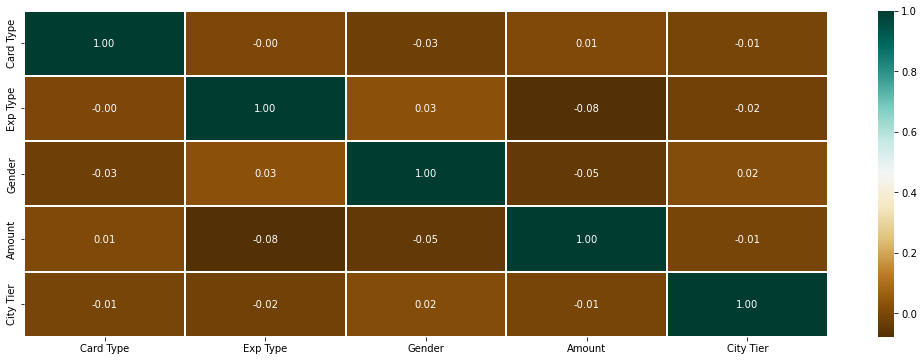

In [23]:
plt.figure(figsize=(18, 6))
sns.heatmap(ml_ccd_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Splitting Data into Train and Test</div>

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Split: </b>To split the data we shall use <b>sklearn.model_selection.train_test_split</b>.  
    
<b>Standardize: </b>To Standardize, we shall use <b>StandardScaler</b>

In [24]:
X= ml_ccd_df[[ 'Card Type', 'Exp Type', 'Gender', 'City Tier']]
y= ml_ccd_df[['Amount']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Linear Regression Model</div>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_scoree = r2_score(y_test, y_pred)
print(Back.YELLOW+ Style.BRIGHT+'R Squared Score for Linear Regression Model is:'+ str(r2_scoree) + Style.RESET_ALL)

R Squared Score for Linear Regression Model is:0.004282175865952698


### <div style="text-align: left; background-color: #E0B279;  color: black; padding: 14px; line-height: 0.5;"> Random Forest Model</div>

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_scoree = r2_score(y_test, y_pred)
print(Back.YELLOW+ Style.BRIGHT+'R Squared Score for Random Forest Regression Model is:'+ str(r2_scoree) + Style.RESET_ALL)

R Squared Score for Random Forest Regression Model is:0.013821373537684756


<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>The Random Forest Model appears to be better than Linear Regression Model, but these models need further tuning.

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Further Observations on Dataset : </b> There is no specific trend observed in monthly transaction count. The sum of transaction amounts is nearly same in all of the cards types with little upper side on one of the card types.
        
Female spends are more than Male and has high values transactions (amount greater than 300K) under Expenses Type Bills. In general the Bills paid on credit cards cannot be as high as 900K.
    
In view of these observations, we can say that the data provided in the dataset is a summarised data and not of individual transactions.
    
The Data provided in the dataset helps in identifying venues for Credit Card business expansion.


# <div style="text-align: Center; background-color: #bd7e4a;  color: black; padding: 14px; line-height: 0.5;"> Thank You</div>  
<div style="text-align: left; background-color: #bd7e4a;  color: black; padding: 14px; line-height: 1.5;"> <b>Thank You</b> for taking time to go through the above analysis. Do comment and Upvote if you like my work.